<a href="https://colab.research.google.com/github/PolinaKovalevaaa/Single-cell-/blob/main/Single_cell_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установим пакеты

In [ ]:
!pip install scanpy[leiden] harmonypy scrublet symphonypy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=4bc81cdc139aa54df91ebf3c497e4503d4a442e64649ae2e6524cab747bba1

In [ ]:
!pip install symphony

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 20.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade symphony


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
import scanpy.external as sce
import symphonypy as sp

sns.set_style("ticks")
sc.settings.verbosity = 3
sc.set_figure_params(dpi=150)

# Загрузим датасет

Загрузим raw_matrix

In [ ]:
!wget "https://cf.10xgenomics.com/samples/cell-exp/7.0.1/SC3pv3_GEX_Human_PBMC/SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5"

--2023-12-16 10:08:59--  https://cf.10xgenomics.com/samples/cell-exp/7.0.1/SC3pv3_GEX_Human_PBMC/SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34092412 (33M) [binary/octet-stream]
Saving to: ‘SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5’

SC3pv3_GEX_Human_PB 100%[===================>]  32.51M  96.5MB/s    in 0.3s    

2023-12-16 10:09:00 (96.5 MB/s) - ‘SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5’ saved [34092412/34092412]



Загрузим filtered_matrix

In [ ]:
!wget "https://cf.10xgenomics.com/samples/cell-exp/7.0.1/SC3pv3_GEX_Human_PBMC/SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5"

--2023-12-16 10:09:03--  https://cf.10xgenomics.com/samples/cell-exp/7.0.1/SC3pv3_GEX_Human_PBMC/SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21005842 (20M) [binary/octet-stream]
Saving to: ‘SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5’

SC3pv3_GEX_Human_PB 100%[===================>]  20.03M  83.7MB/s    in 0.2s    

2023-12-16 10:09:03 (83.7 MB/s) - ‘SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5’ saved [21005842/21005842]



In [ ]:
adata_filtered = sc.read_10x_h5("SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5")

reading SC3pv3_GEX_Human_PBMC_filtered_feature_bc_matrix.h5
 (0:00:03)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
adata_raw = sc.read_10x_h5("SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5")

reading SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5
 (0:00:03)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Фильтрация по umi И визуализация на графике

In [ ]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

adata_umi=adata_raw.copy()

def filter_and_save(umi_threshold):
    # Загрузка данных из файла raw_feature_bc_matrix.h5
    adata_raw = sc.read_10x_h5("SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5")


    # Фильтрация по минимальному количеству UMI
    sc.pp.filter_cells(adata_umi, min_counts=umi_threshold)


    # Сохранение отфильтрованных данных. Они не очень сохраняются в формат h5ad....
    #output_file = f"filtered_feature_bc_matrix_umi_threshold.h5ad"
    #adata_umi.write(output_file)
    #print(f"Filtered data with min_counts=umi_threshold saved to output_file")
    #print(adata_umi.X)


    # Первый график
    counts_per_cell = adata_filtered.X.sum(axis=1).T.A[0]
    sns.histplot(counts_per_cell, color='blue', label='Filtered Data')

    # Второй график
    counts_per_cell_umi = adata_umi.X.sum(axis=1).T.A[0]
    sns.histplot(counts_per_cell_umi, color='orange', label='UMI Data', alpha=0.5)

    plt.legend()
    plt.show()

    return adata_umi



# Распределение типов клеток

Umap для filtered_data

In [ ]:
adata_ref = adata_filtered
adata_ref.obs["tissue"] = "PBMC"
adata_ref.var_names_make_unique()
adata_ref.obs.head()

,tissue
AAACCCAGTCGGCCTA-1,PBMC
AAACCCATCAGATGCT-1,PBMC
AAACGAAAGATTAGCA-1,PBMC
AAACGAAAGTGCTACT-1,PBMC
AAACGAAGTCGTAATC-1,PBMC


In [ ]:
sce.pp.scrublet(adata_ref, batch_key="tissue")

Running Scrublet
filtered out 12863 genes that are detected in less than 3 cells


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 42.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.2%
    Scrublet finished (0:00:12)


In [ ]:
sc.pp.normalize_total(adata_ref, target_sum=1e5) # 1e5 will be used for query
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(
    adata_ref,
    n_top_genes=3000,
)
adata_ref.raw = adata_ref

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [ ]:
adata_ref = adata_ref[:, adata_ref.var.highly_variable]
sc.pp.scale(adata_ref, max_value=2000)
sc.pp.pca(adata_ref, n_comps=30, zero_center=False)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:01)


In [ ]:
sce.pp.harmony_integrate(adata_ref, key="tissue", max_iter_harmony=30)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.tl.leiden(adata_ref)

2023-12-16 10:33:20,420 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-12-16 10:33:22,312 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-12-16 10:33:22,350 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2023-12-16 10:33:23,674 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2023-12-16 10:33:24,979 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2023-12-16 10:33:26,836 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2023-12-16 10:33:29,648 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2023-12-16 10:33:30,909 - harmonypy - INFO - Iteration 6 of 30
INFO:harmonypy:Iteration 6 of 30
2023-12-16 10:33:31,309 - harmonypy - INFO - Converged after 6 iterations
INFO:harmonypy:Converged after 6 iterations


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


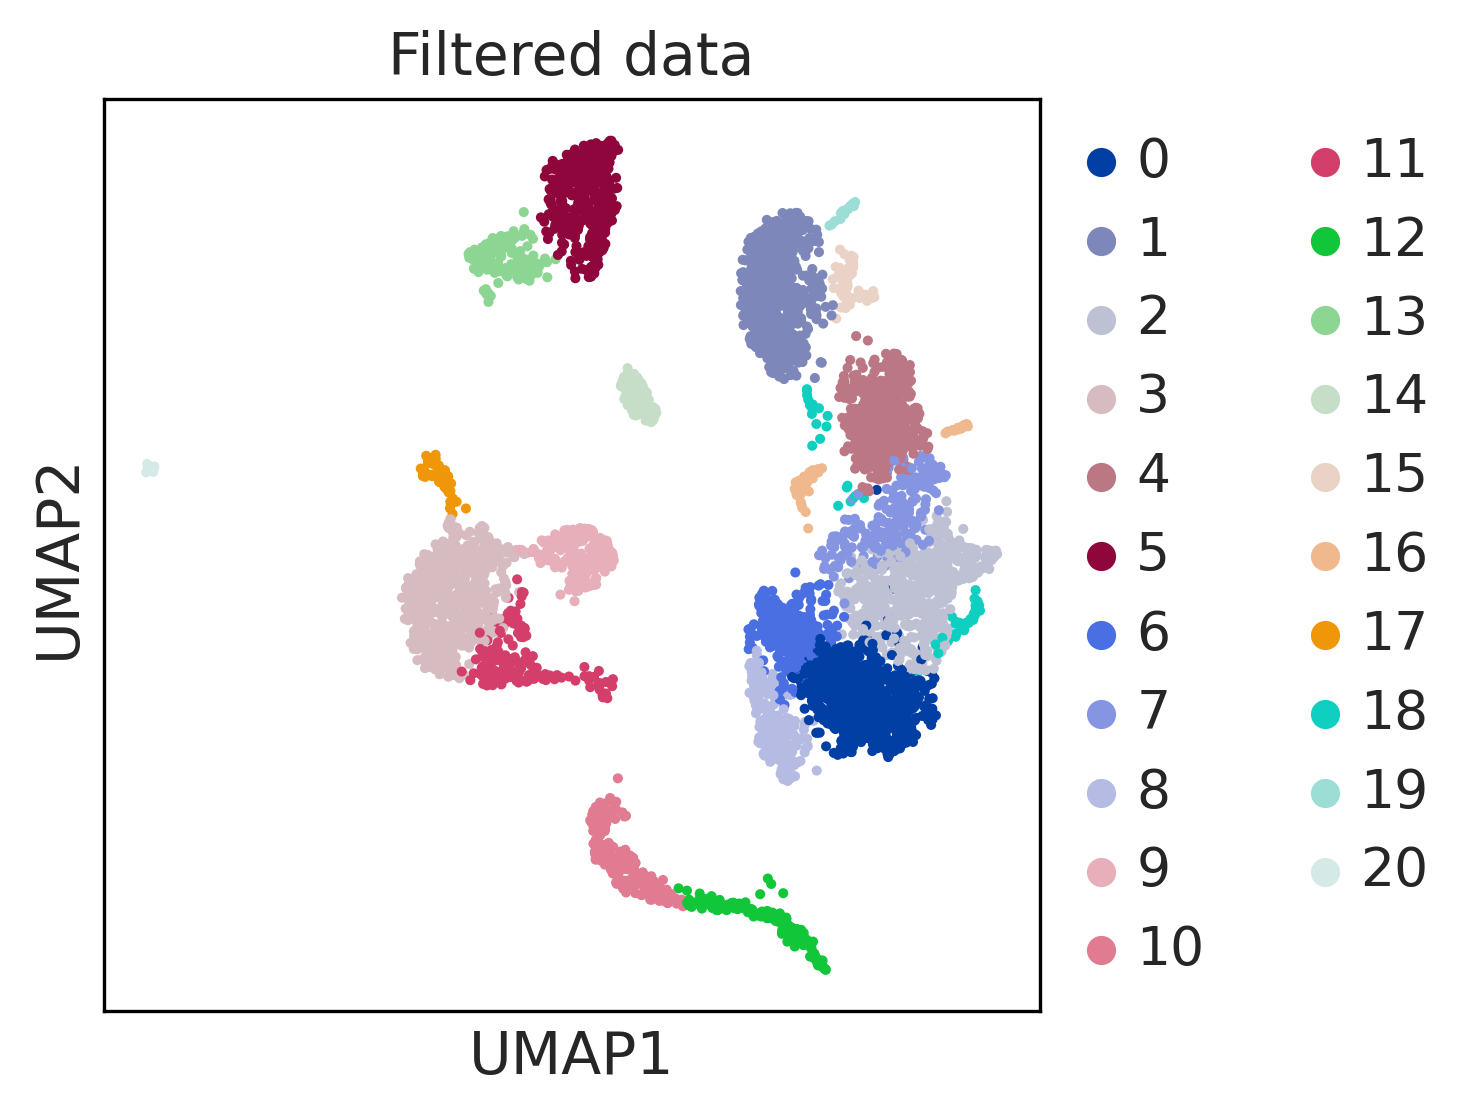

In [ ]:
sc.pl.umap(adata_ref, color=["leiden"], title=["Filtered data"])

In [ ]:
adata_raw

AnnData object with n_obs × n_vars = 909706 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:

adata_ref.write_h5ad("processed.h5ad")

In [ ]:
adata_raw = sc.read_10x_h5("SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5")
adata_umi=adata_raw.copy()
adata_umi.var_names_make_unique()
adata_umi.obs["tissue"] = "PBMC"
sc.pp.filter_cells(adata_umi, min_counts=100)
print(adata_umi)

reading SC3pv3_GEX_Human_PBMC_raw_feature_bc_matrix.h5
 (0:00:02)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 903016 cells that have less than 100 counts


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6690 × 36601
    obs: 'tissue', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'


In [ ]:
sce.pp.scrublet(adata_umi, batch_key="tissue")

Running Scrublet
filtered out 12820 genes that are detected in less than 3 cells


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 21.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.0%
    Scrublet finished (0:00:41)


In [ ]:
sc.pp.normalize_total(adata_umi, target_sum=1e5) # 1e5 will be used for query
sc.pp.log1p(adata_umi)
sc.pp.highly_variable_genes(
    adata_umi,
    n_top_genes=3000,
)
adata_umi.raw = adata_umi

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [ ]:
adata_umi = adata_umi[:, adata_umi.var.highly_variable]
sc.pp.scale(adata_umi, max_value=2000)
sc.pp.pca(adata_umi, n_comps=30, zero_center=False)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:03)


In [ ]:
sce.pp.harmony_integrate(adata_umi, key="tissue", max_iter_harmony=30)
sc.pp.neighbors(adata_umi)
sc.tl.umap(adata_umi)
sc.tl.leiden(adata_umi)

2023-12-16 13:12:54,787 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-12-16 13:12:57,065 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-12-16 13:12:57,110 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2023-12-16 13:12:58,910 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2023-12-16 13:13:00,674 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2023-12-16 13:13:02,510 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2023-12-16 13:13:06,266 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2023-12-16 13:13:08,846 - harmonypy - INFO - Iteration 6 of 30
INFO:harmonypy:Iteration 6 of 30
2023-12-16 13:13:09,398 - harmonypy - INFO - Converged after 6 iterations
INFO:harmonypy:Converged after 6 iterations


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


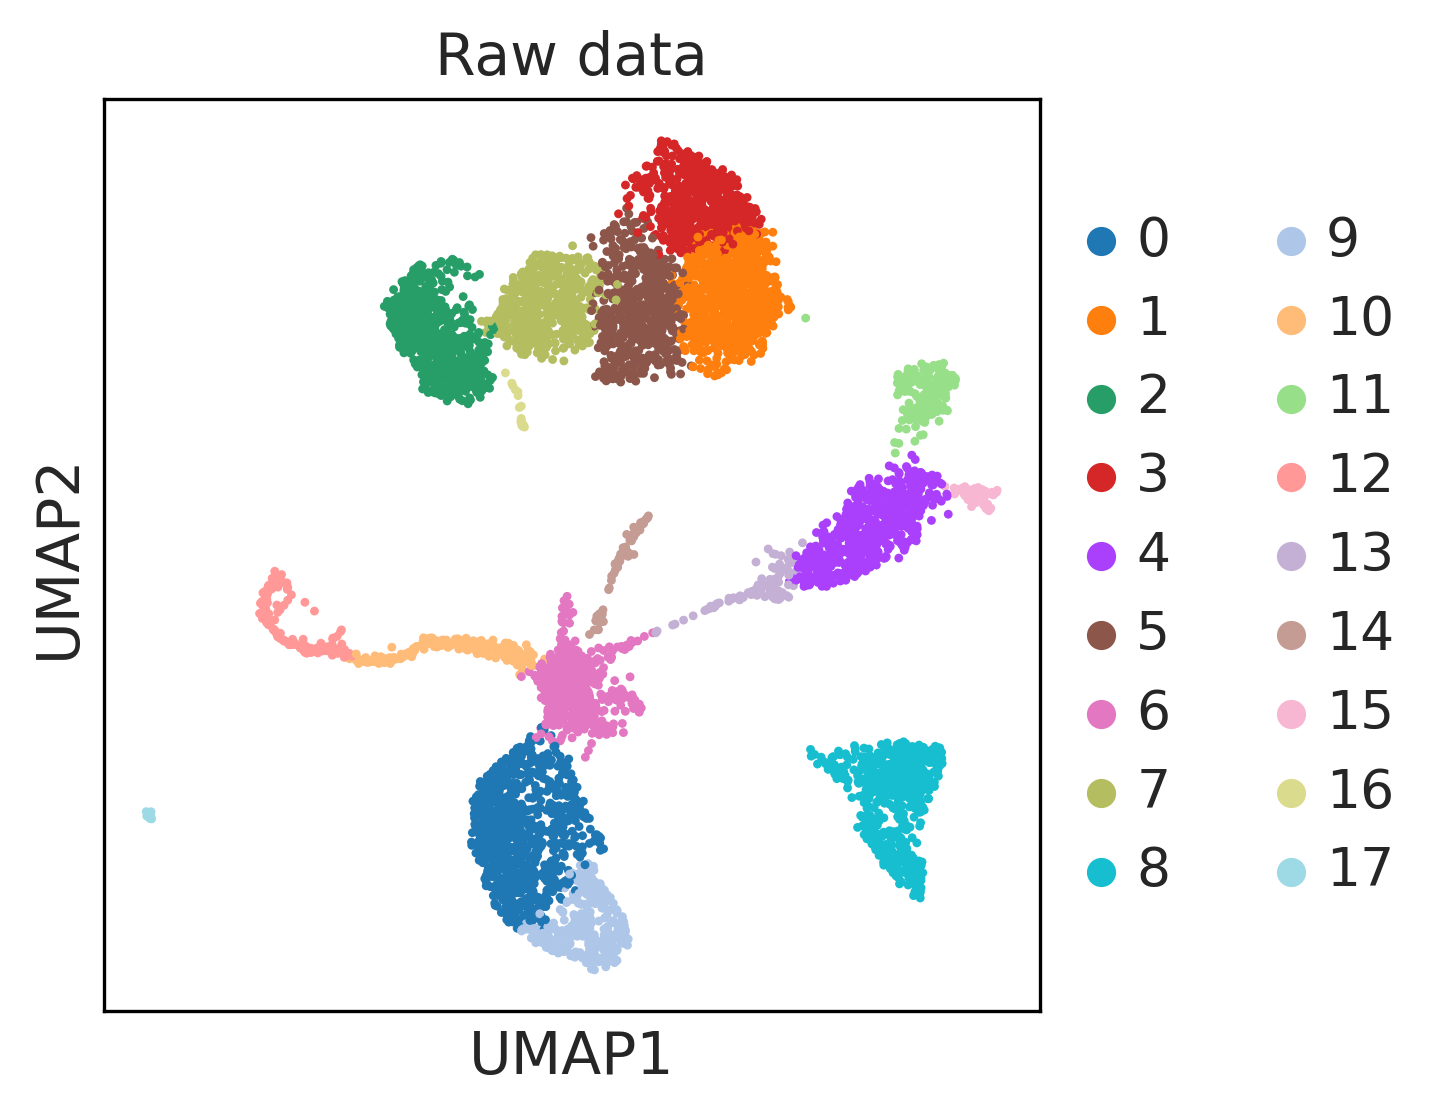

In [ ]:
sc.pl.umap(adata_umi, color=["leiden"], title=["Raw data"])

In [ ]:
adata_umi

AnnData object with n_obs × n_vars = 5154 × 3000
    obs: 'tissue', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_ref

AnnData object with n_obs × n_vars = 5140 × 3000
    obs: 'tissue', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Аннотация типов клеток

In [ ]:
import symphonypy as sp

adata_reference = sp.datasets.pbmcs_10x_reference()

try downloading from url
https://zenodo.org/record/7607565/files/pbmcs_10x_reference.h5ad
... this may take a while but only happens once
creating directory data/symphony_ref/ for saving data


  0%|          | 0.00/38.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


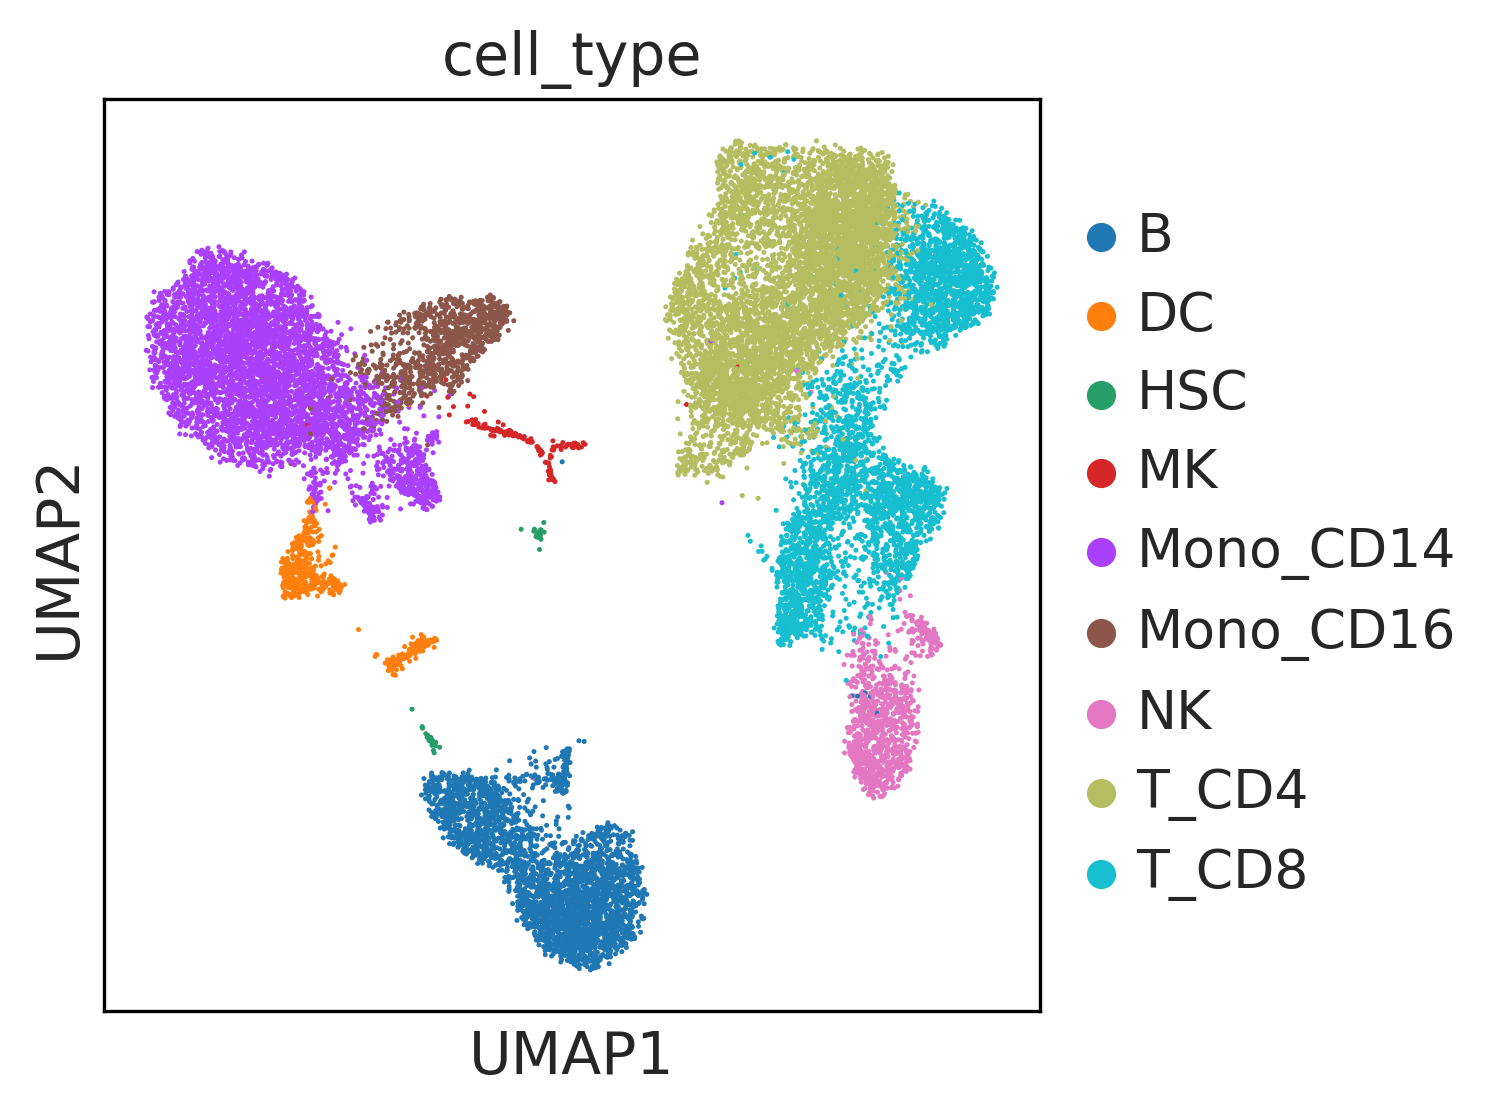

In [ ]:
sc.pl.umap(adata_reference, color="cell_type")

In [ ]:
adata_query_r = adata_ref.raw.to_adata()
adata_query_r

AnnData object with n_obs × n_vars = 5140 × 36601
    obs: 'tissue', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
sp.tl.map_embedding(adata_query_r, adata_reference, key="tissue")
sp.tl.per_cell_confidence(adata_query_r, adata_reference)
sp.tl.transfer_labels_kNN(adata_query_r, adata_reference, ref_labels=["cell_type"])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


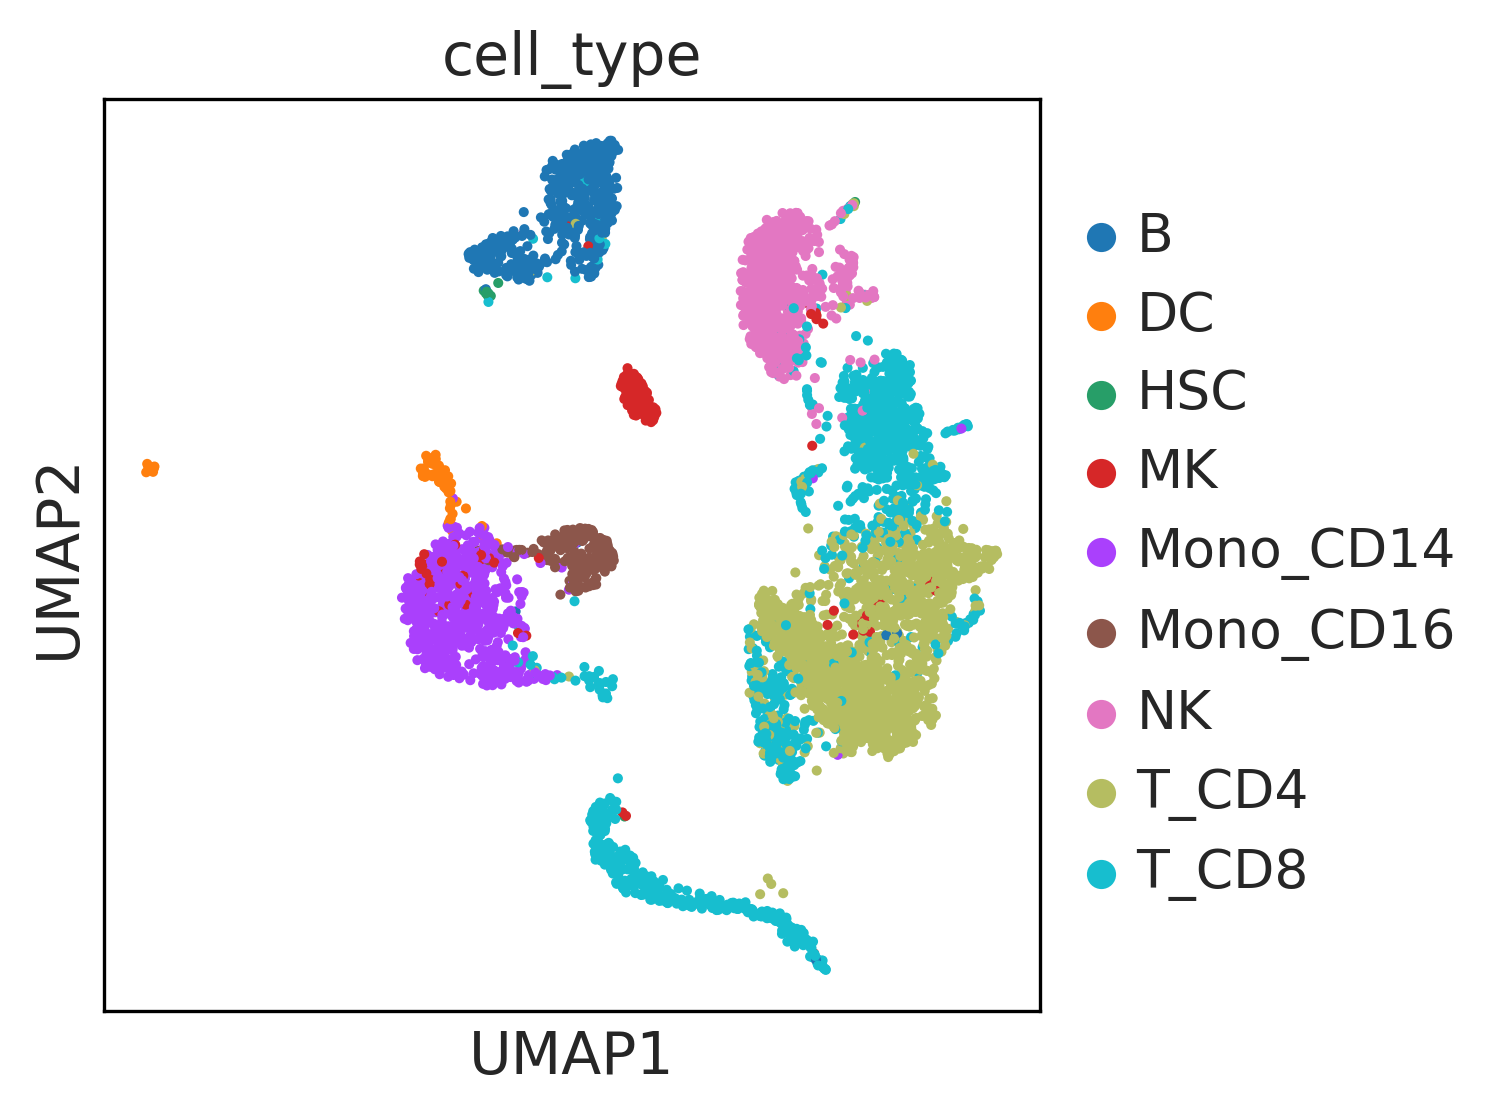

In [ ]:
sc.pl.umap(adata_query_r, color="cell_type")

In [ ]:
adata_query_u = adata_umi.raw.to_adata()
adata_query_u

AnnData object with n_obs × n_vars = 6690 × 36601
    obs: 'tissue', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
sp.tl.map_embedding(adata_query_u, adata_reference, key="tissue")
sp.tl.per_cell_confidence(adata_query_u, adata_reference)
sp.tl.transfer_labels_kNN(adata_query_u, adata_reference, ref_labels=["cell_type"])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


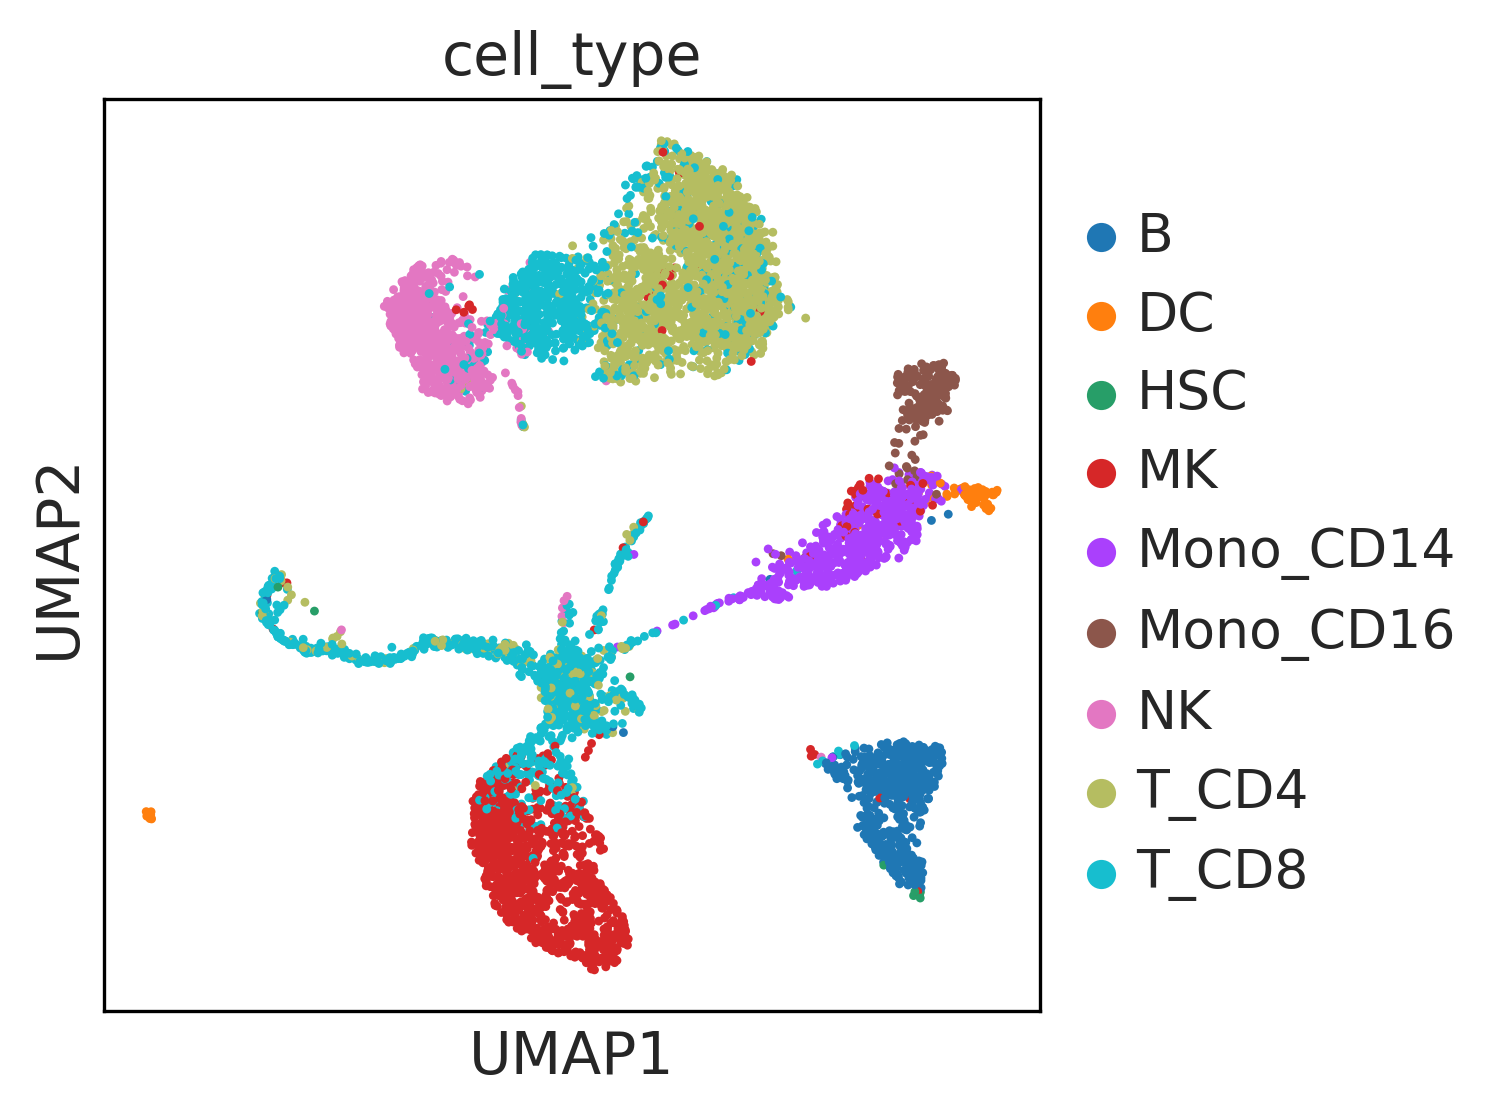

In [ ]:
sc.pl.umap(adata_query_u, color="cell_type")

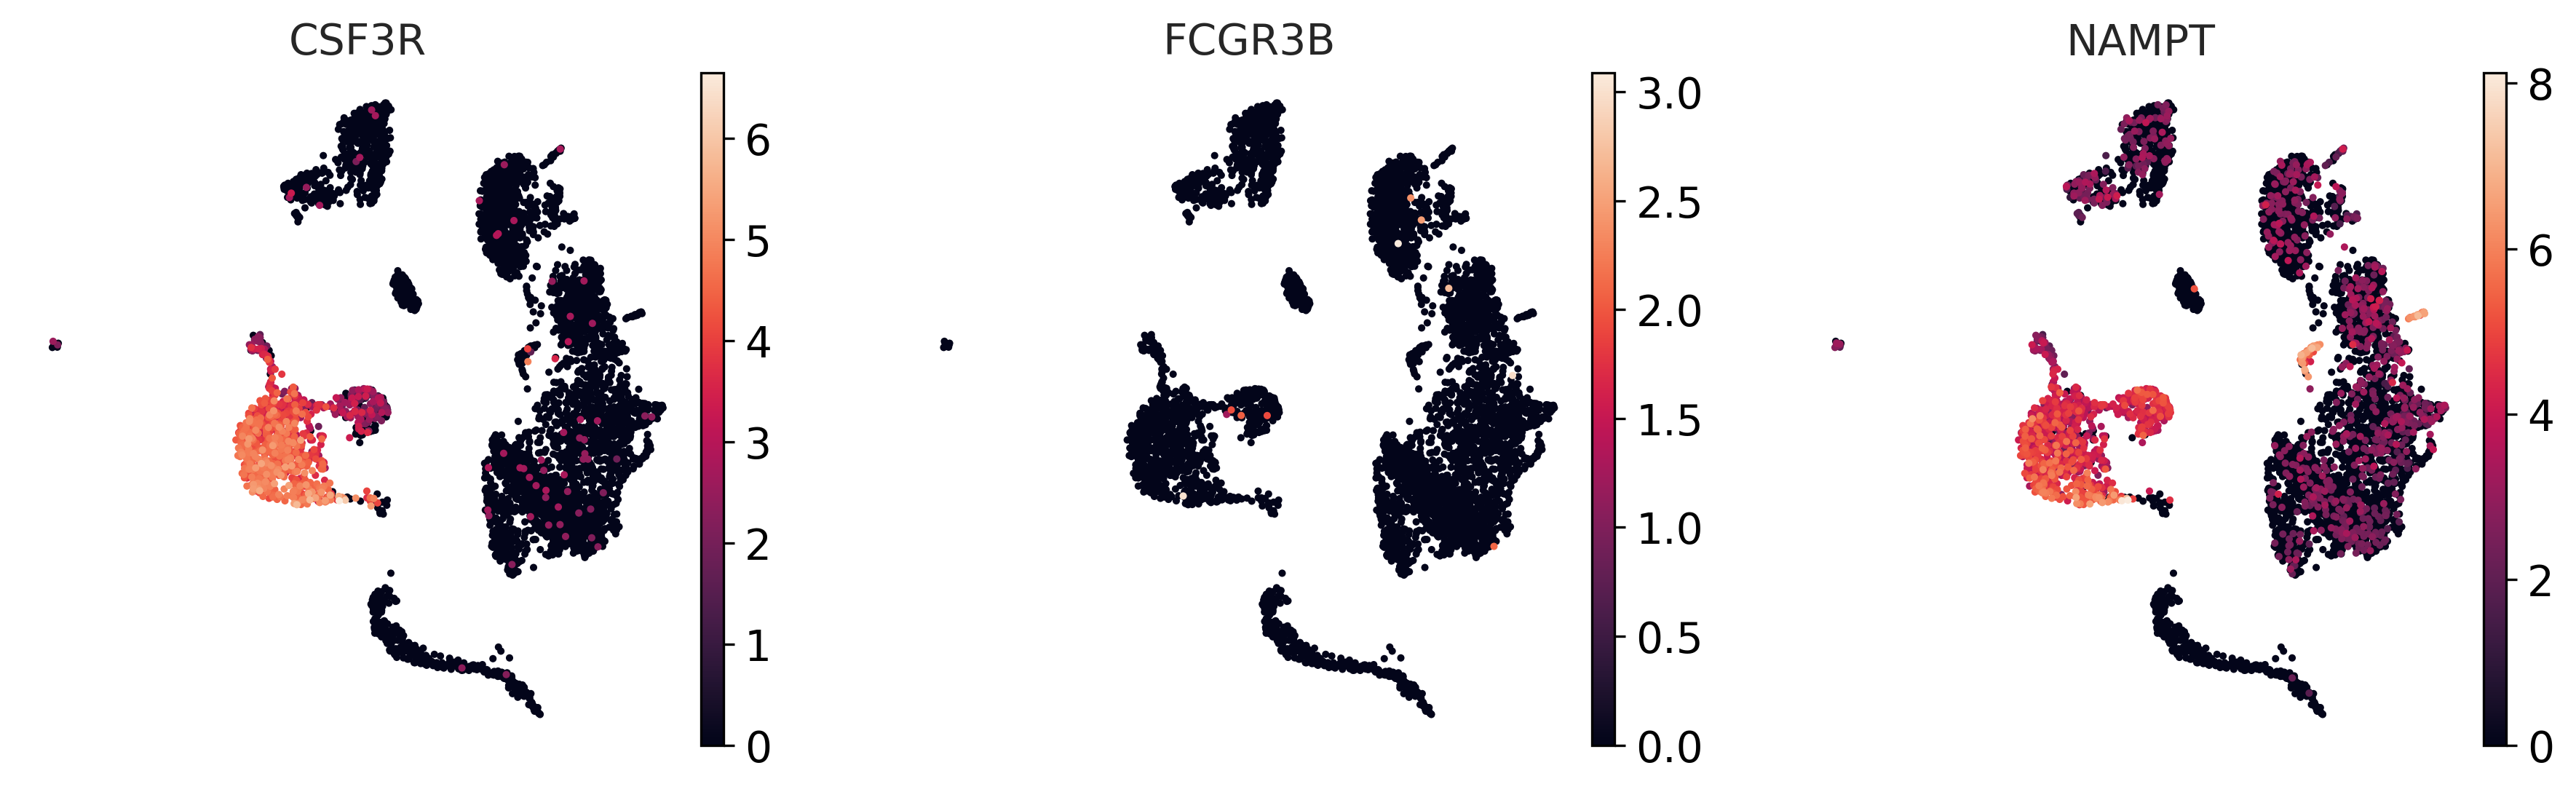

In [ ]:
sc.pl.umap(adata_query_r, color=["CSF3R", "FCGR3B", "NAMPT"], frameon=False)

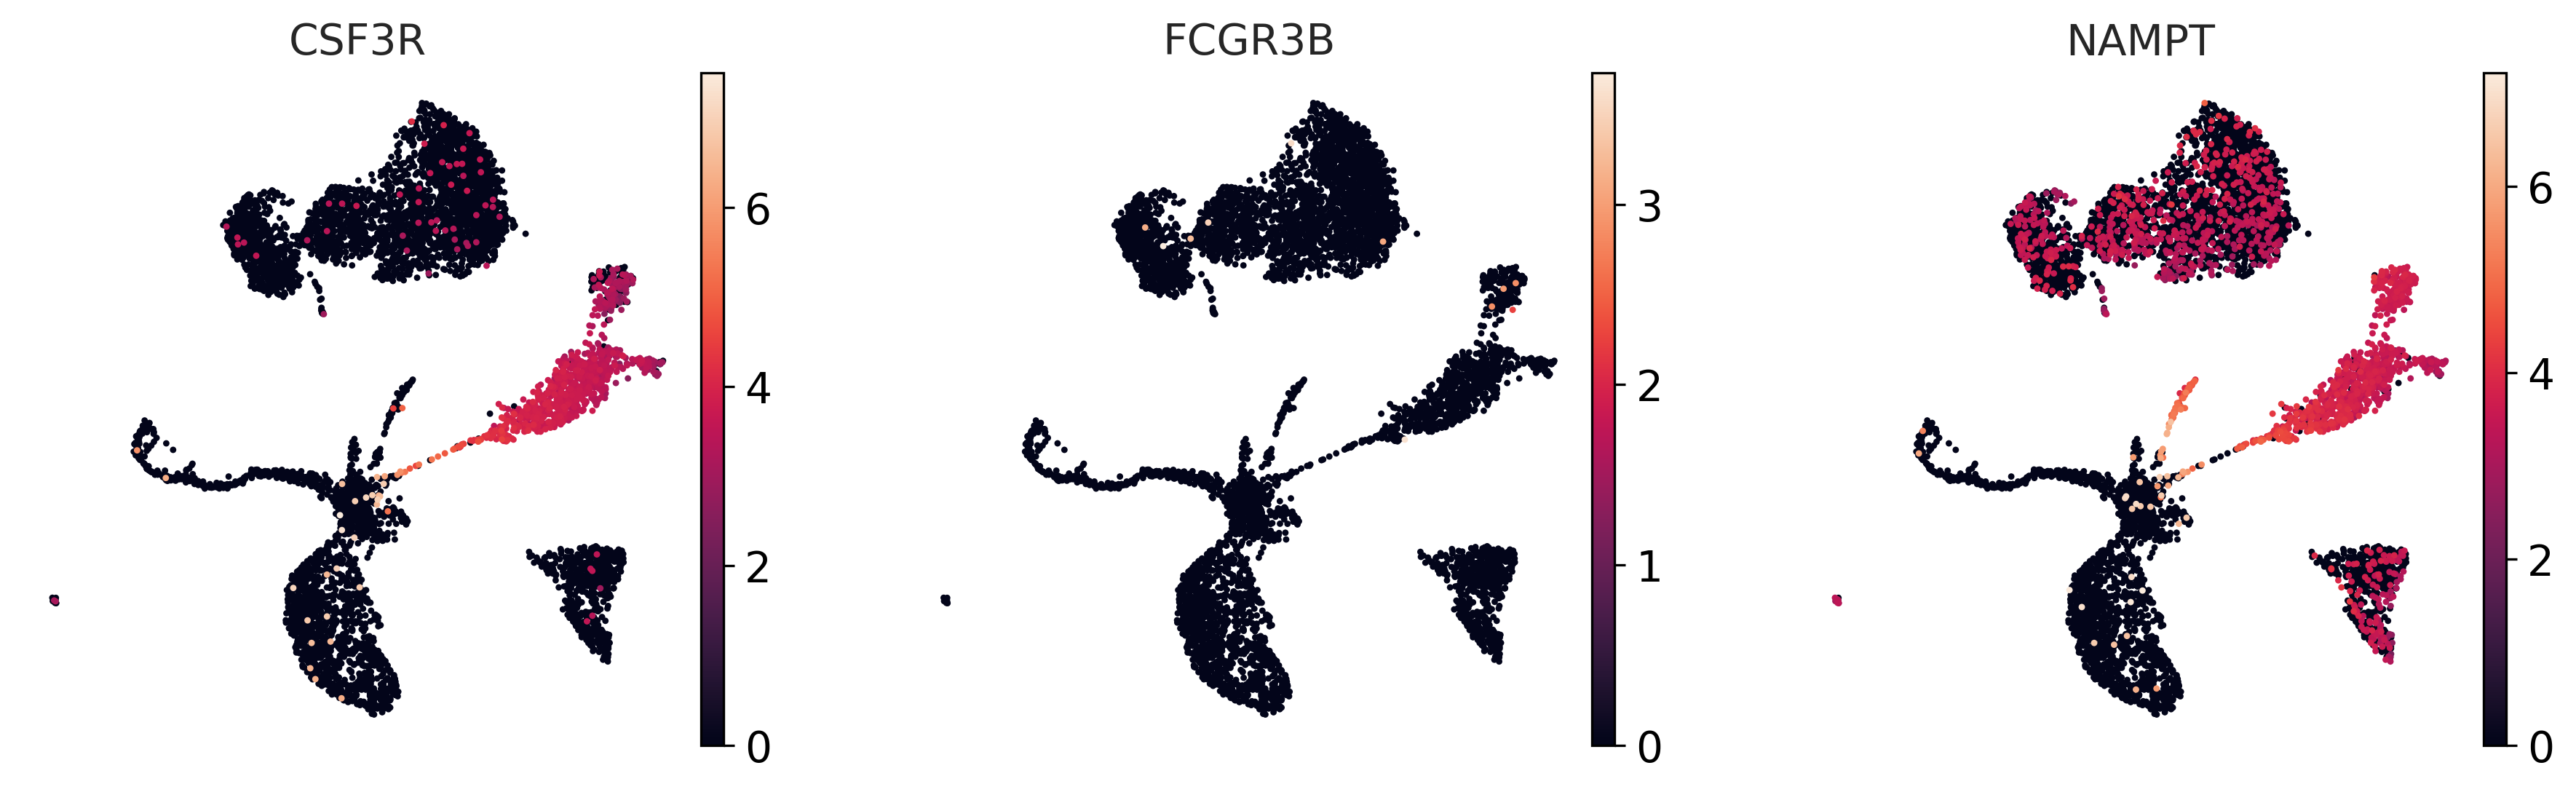

In [ ]:
sc.pl.umap(adata_query_u, color=["CSF3R", "FCGR3B", "NAMPT"], frameon=False)

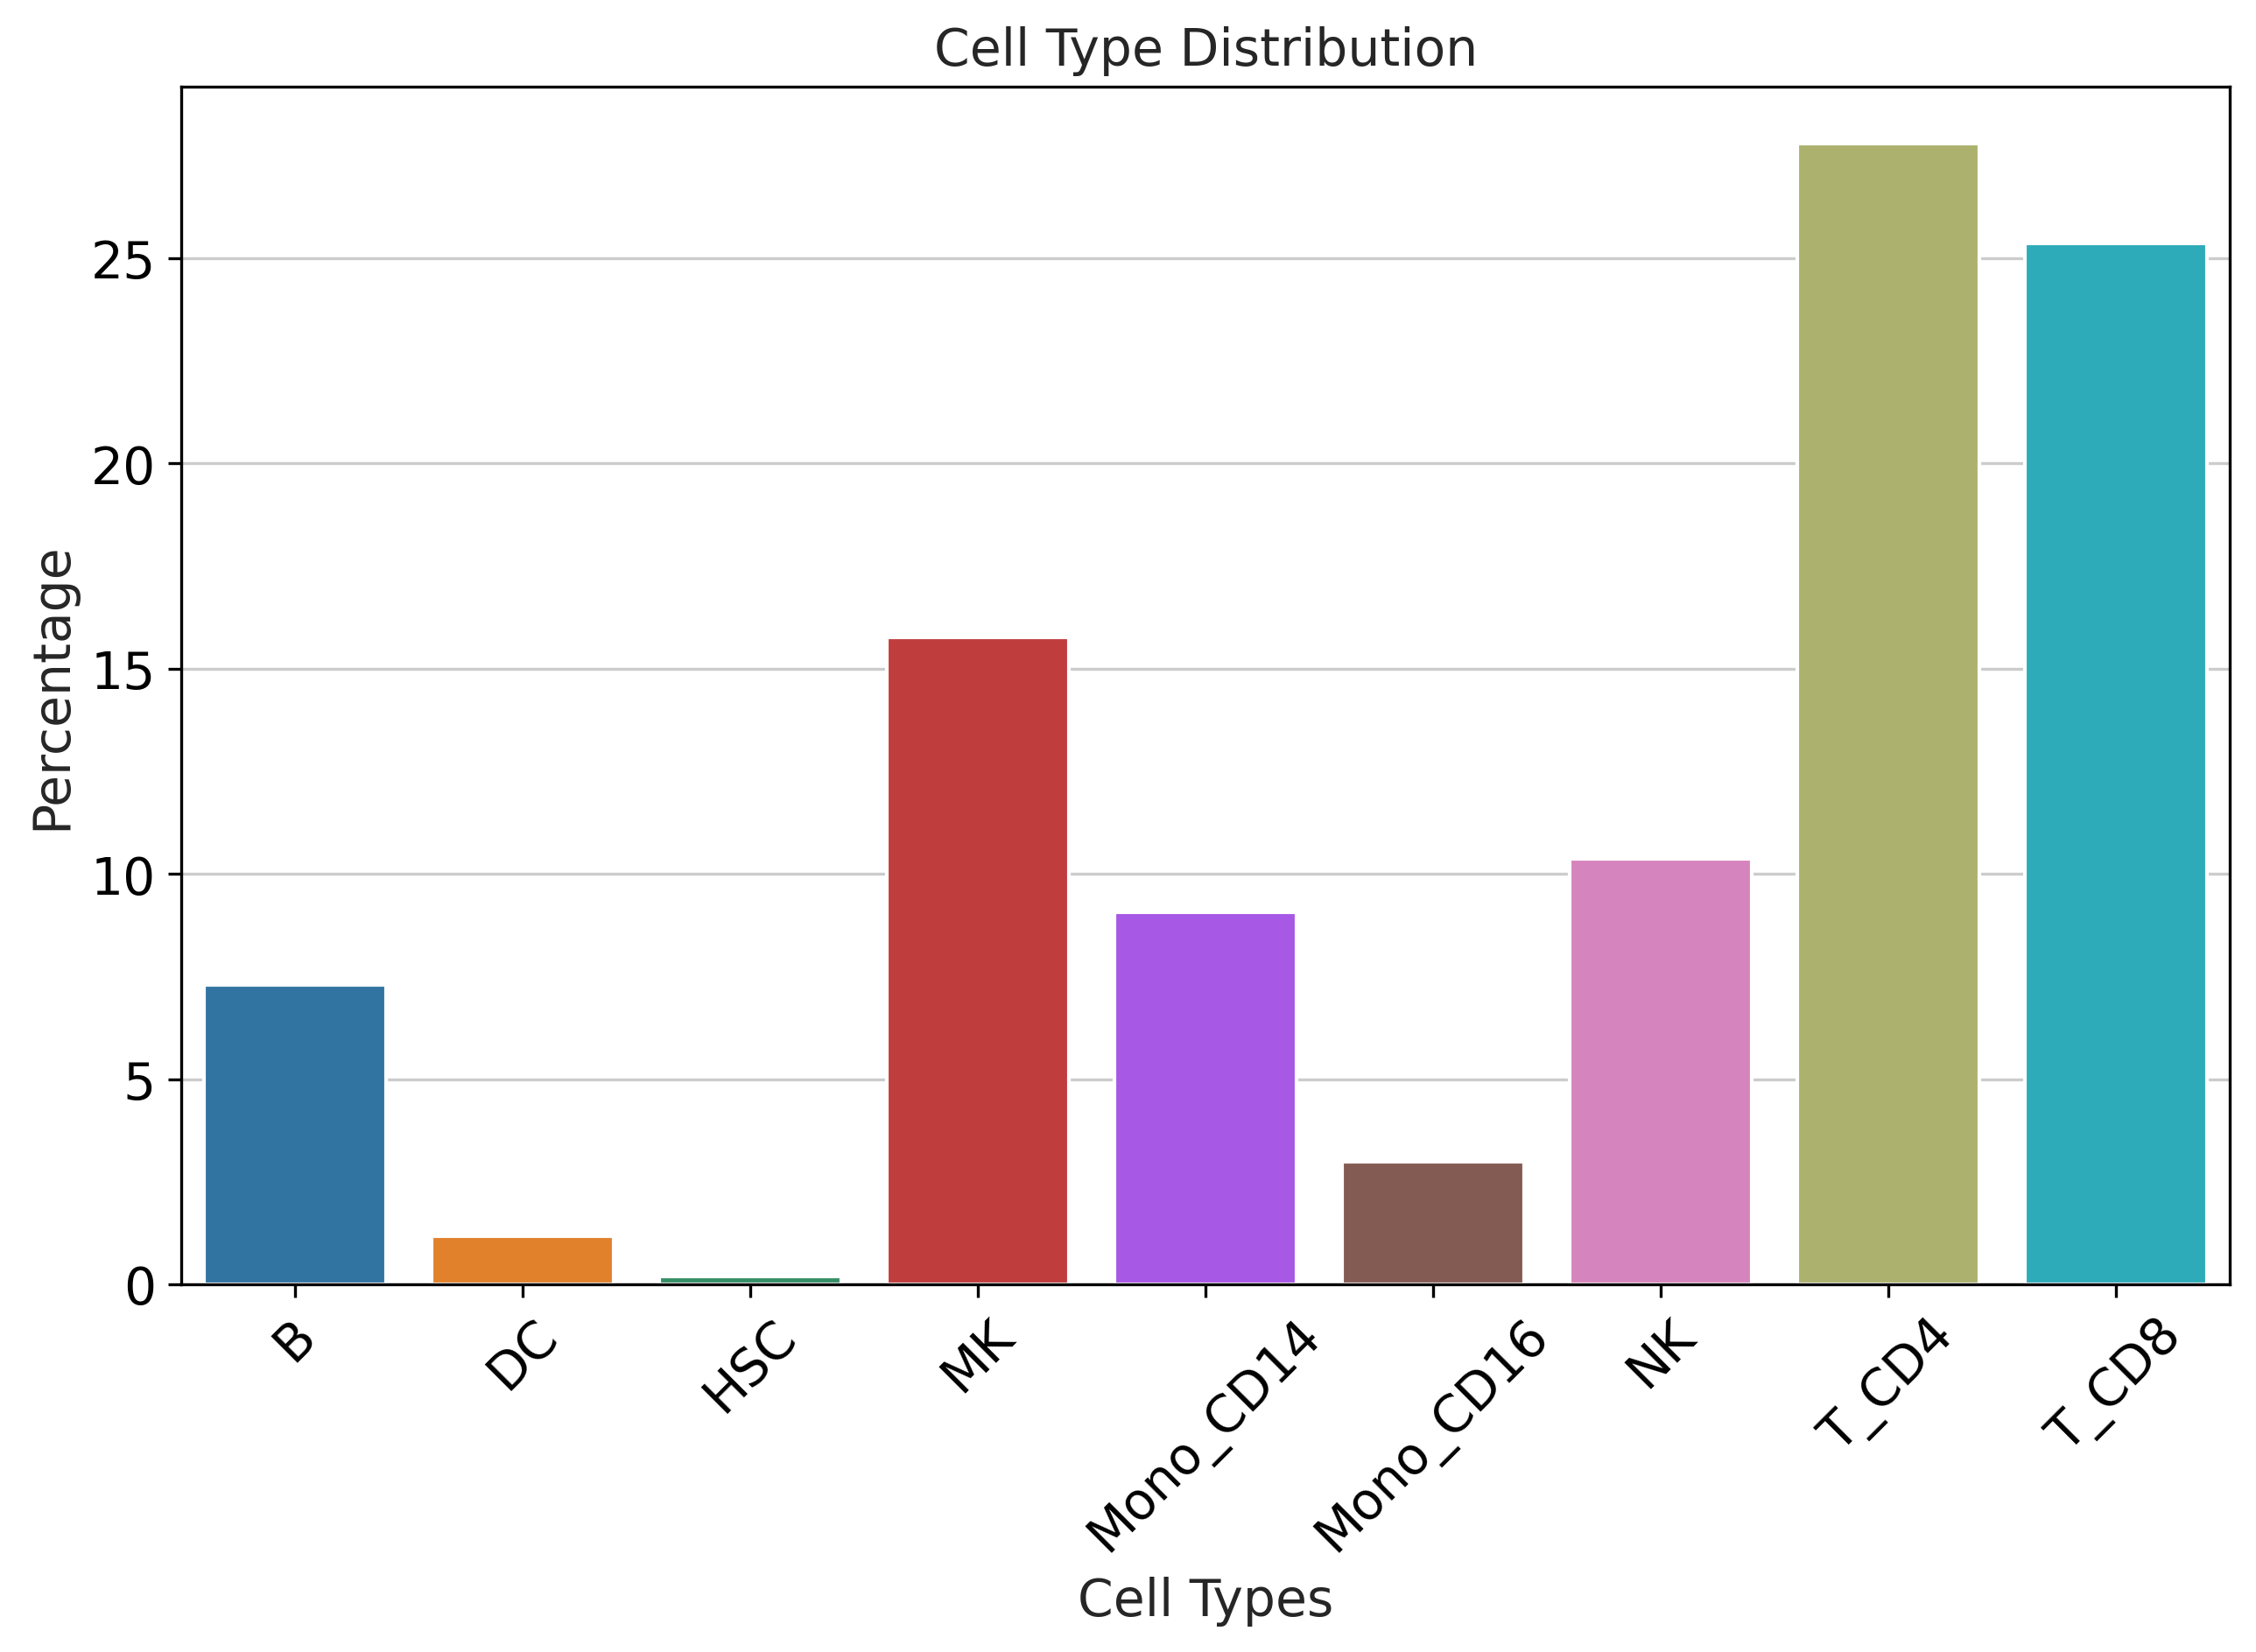

In [ ]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

cell_type_counts = adata_query_u.obs['cell_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values)
plt.xlabel('Cell Types')
plt.ylabel('Percentage')
plt.title('Cell Type Distribution')
plt.xticks(rotation=45)
plt.show()

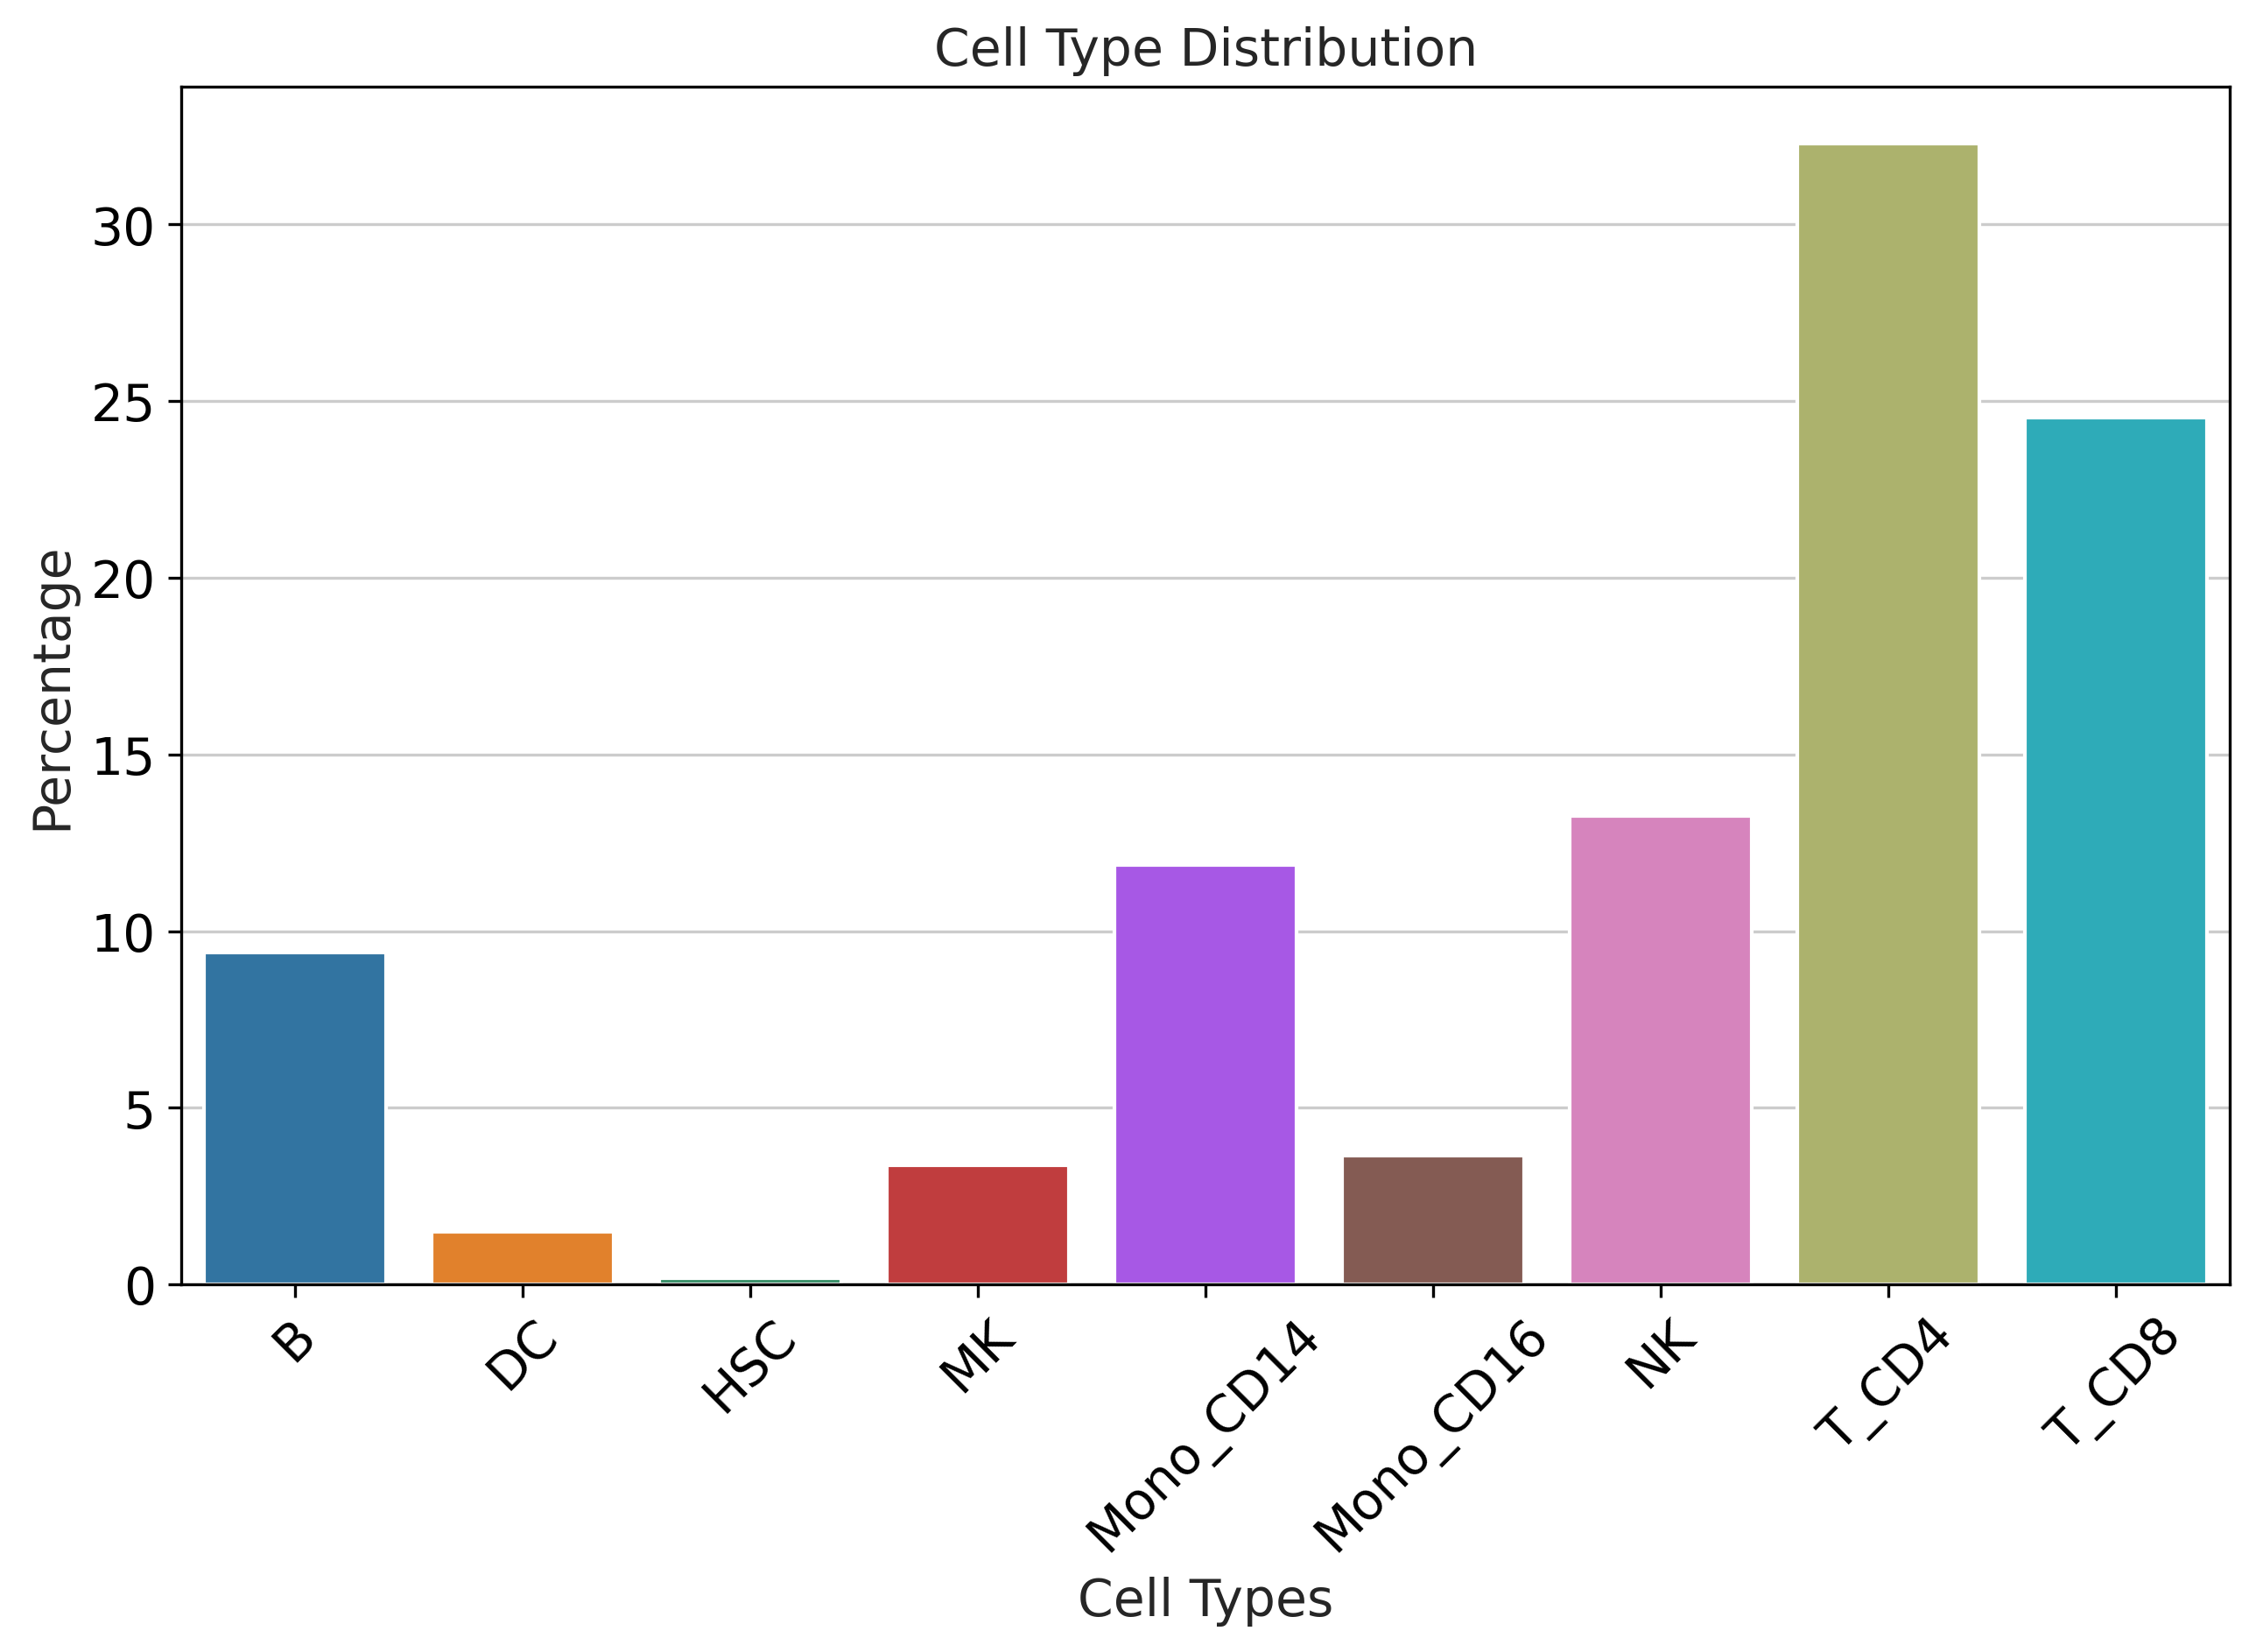

In [ ]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

cell_type_counts = adata_query_r.obs['cell_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values)
plt.xlabel('Cell Types')
plt.ylabel('Percentage')
plt.title('Cell Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
adata_query_u

AnnData object with n_obs × n_vars = 6690 × 36601
    obs: 'tissue', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'symphony_per_cell_dist', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_pca_reference', 'X_pca_harmony_symphony_R'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_umi.write_h5ad("processed_umi.h5ad")